In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
os.chdir('E:\Data\Movie_Recom\KNN Movie Recom\ml-latest-small')

In [5]:
movies = pd.read_csv('movies.csv', usecols = ['movieId', 'title'],dtype={'movieId': 'int32', 'title': 'str'})
rating = pd.read_csv('ratings.csv', usecols = ['movieId', 'rating', 'userId'], dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [6]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [7]:
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [8]:
df = pd.merge(movies, rating, on = 'movieId')

In [9]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [12]:
df_1 = df.dropna(axis = 0, subset = ['title'])
rating_count = df_1.groupby('title')['rating'].count().reset_index().rename(columns = {'title':'title', 'rating':'rating_count'})

In [13]:
rating_count.head()

,title,rating_count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [15]:
rating_with_total_count = df_1.merge(rating_count, on = 'title')

In [16]:
rating_with_total_count.head()

,movieId,title,userId,rating,rating_count
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


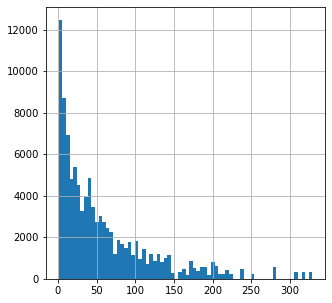

In [18]:
plt.figure(figsize = (5, 5))
rating_with_total_count['rating_count'].hist(bins = 70)
plt.show()

In [19]:
popularity_threshold = 50     # Selected from above graph
popular_movie = rating_with_total_count.query('rating_count >= @popularity_threshold')
popular_movie.head()

,movieId,title,userId,rating,rating_count
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


In [20]:
popular_movie.shape

(41362, 5)

In [22]:
pivot = popular_movie.pivot_table(index = 'title', columns = 'userId', values = 'rating').fillna(0)

In [23]:
pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [24]:
#Convert the pivot table to array matrix
from scipy.sparse import csr_matrix
pivot_matrix = csr_matrix(pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(pivot_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [29]:
index = np.random.choice(pivot.shape[0])
print(index)

distances, indexes = model_knn.kneighbors(pivot.iloc[index,:].values.reshape(1, -1), n_neighbors = 6)

214


In [35]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot.index[index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot.index[indexes.flatten()[i]], distances.flatten()[i]))

Recommendations for Independence Day (a.k.a. ID4) (1996):

1: Mission: Impossible (1996), with distance of 0.3226460814476013:
2: Jurassic Park (1993), with distance of 0.36158162355422974:
3: Twister (1996), with distance of 0.37938201427459717:
4: Star Wars: Episode VI - Return of the Jedi (1983), with distance of 0.411146879196167:
5: Terminator 2: Judgment Day (1991), with distance of 0.4115862250328064:
